# QAssist subprint to card

(last update: June 9, 2024)

QAssistのサブプリントを分割してデッキ化するソフトウェアです。
Ankiでの使用を想定し、デッキをロードするためのCSVファイル (表ファイル)も同時に生成します。
家庭内で依頼されて個人的に作成したものを、個人学習の効率化の目的の下一般公開しています。

## ライセンス・免責事項

**MIT License**で公開します。
つまり著作権および許諾表示により、自由な使用、改変、複製、再頒布が可能です。
本ソフトウェアの使用または第三者への提供によって生じるいかなる損害や結果に対して、開発者は一切責任を負いません。
また本ソフトウェアは個人利用の範疇での使用を想定しております。
**生成されたカードデッキの著作権は使用した資料の著作者に属する**点に留意し、その公開や共有は**原則行わないでください**。
加えて公開時点での資料を対象に最適化されており、将来の改訂により適切に動作しなくなる可能性があります。
その場合は、各自内部パラメータやコードの修正が必要になりますが予めご了承ください。

In [ ]:
#@title MIT License
#
# Copyright (c) 2024 Katsuma Inoue
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

## 使い方と実行環境

Google DriveとGoogle Colaboratoryによるオンラインでの使用を想定しています。
また自前でPythonの環境を構築できる場合は、ローカル（手元の環境）でも動作できます。
ここでは前者のオンラインの方法を説明します（後者の方法でも認証のプロセスがないだけで大差はないです）。
要約すると以下の5ステップ（Googleアカウントの作成・ログインを含め6ステップ）により完了します。
なお不明な点はGitHubのissue欄からお問い合わせください（多忙のため返信に時間を要する場合がありますが予めご了承ください）。  

0. Google Accountの作成＆ログイン
1. Google Driveの認証＆ファイルのアップロード
2. ファイル名の指定・読み込み
3. 切り抜きの実行＆保存
4. Zipのダウンロードとフォルダの展開
5. （任意）テンプレートの作成

順に各セクションで詳細な説明が記載されています。

### 1. ファイルのアップロード＆Google Driveの認証

まずGoogle drive上に切り抜きしたい対象のPDFファイルをアップロードしてください。
穴埋めが空欄になっている**空欄PDF**と、解答が表示されている**解答PDF**の両方が必要です。
アップロードが完了したらGoogle Driveの認証を行いフォルダへのアクセスを準備します。
次のセル（四角で囲われた領域）を選択して実行（`Shift+Enter`か左側の「再生ボタン」をクリック、以下同様）してください。
しばらくした後、認証用のポップアップ画面が出現し、アクセス許可を求められるはずです。
チェックボックスを入れてすべてアクセスを許可してください。

In [ ]:
#@title Google Driveの認証・ライブラリのインストール・ファイルの読み込み

import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    %pip install PyMuPDF
    !git clone https://github.com/katsuma-inoue-42/qassist_to_card.git
    %cd qassist_to_card

from to_card import run_all

### 2. フォルダ名の指定・読み込み
次に以下のセルでファイルのパス（ファイルが保存されているフォルダ）を指定してください。
Google Driveの場合は認証後、左側のファイルアイコンから対象のPDFファイルを選んでください（`/content/gdrive/`以下から読み込みたいファイルを右クリックし「パスをコピー」から選択できます）。
その後**穴埋めpdf**のパスを`blank_pdf`、**解答pdf**を`filled_pdf`に入力してください。
完了したらセルを実行してください。
エラーが出た場合はパスの指定が間違っているので修正してください。

#### (任意) 解像度を変更する場合
デフォルトでは生成されるカードのdpi（dots per inch; 画面解像度）を`200`に指定しています。
テストした範囲では使用上問題はありませんでしたが、`dpi`の変更により解像度を調整できます。
ただしこの数値のおよそ2乗に最終的なファイルサイズが比例する点に注意してください。

#### (任意) 出力フォルダを変更する場合
`output_folder`を空欄にしている場合は`blank_pdf`が配置されているフォルダに`blank_pdf`と同じ名前のフォルダが生成されその中に出力されます。
それ以外の場合で`output_folder`を指定した場合はその場所に直接出力されます。Google Driveの場合は`blank_pdf`や`filled_pdf`と同じように対象のフォルダを右クリック＆「パスのコピー」により`output_folder`選択できます。


In [ ]:
#@title パラメータの指定

blank_pdf = '/content/gdrive/MyDrive/...'  #@param {type:'string'}
filled_pdf = '/content/gdrive/MyDrive/...'  #@param {type:'string'}
dpi = 200  #@param {type:'number'}
output_folder = ''  #@param {type:'string'}

for file_name in [blank_pdf, filled_pdf]:
    assert os.path.exists(file_name), f'Error: ファイル（{file_name}）が見つかりません！認証かパスを確認してください。'

if output_folder == '':
    dirname = os.path.dirname(blank_pdf)
    basename = os.path.splitext(os.path.basename(blank_pdf))[0]
    output_folder = f'{dirname}/{basename}'

### 3. 切り抜きの実行＆保存

各フォルダ数10秒から数分程度時間がかかります。
zipファイルが生成されますが、Google Driveを使用している際は反映までに時間がかかる場合があります。
生成されたファイルをダウンロードしてください。
Google Driveを使用している場合は左側の欄より右クリックしダウンロードできます。

※ 古いファイルを消去する場合は`rm -rf {output_folder}`をコメントアウト（先頭の`# `を消す）してください。

<details><summary>※多少コーディングの知識のある方に向けた修正の手引</summary>

GitHubにアクセスしていただければ見れますが、切り抜き処理を実現する関数の本体は[`to_card.py`](https://github.com/katsuma-inoue-42/qassist_to_card/blob/master/to_card.py)で実装されています。
以下簡単な関数の説明です。
テキストの改訂で正常に動作しなくなった際に参考にしてください。
またバグ修正や改良の提案等でPRやissueを送っていただけると幸いです。

- `extract_title`: 単元名を抽出する関数。
p. 1に含まれるテキストの最後を抽出。
この返り値が`lecture_name`として次の関数に渡される。
- `extract_bbox`: 各ページの問題に含まれるbbox（バウンディングボックス）と文字情報を抽出する関数。
引数にある4つの`header_threshold, footer_threshold, left_indent_threshold, side_note_threshold`はそれぞれメインテキストに対する上下左右のマージンを制御しており、これによりメインテキスト内の領域の大きさを制御。
各問題`problem`は辞書型`dict`により定義され最終的にはその配列`problems`が返される。以下`problem`の主な内容を記す。
  - `bbox`: `'□'`を含むbboxから次の`'□'`を含むbboxまでのメインテキスト内に含まれる全てのbbox（`list`）
  - `page_number`: ページ番号（`int`）
  - `lecture_id`: 単元ID (`str`, 通常アルファベット1~2文字)
  - `chapter_id`: 章ID（`int`）
  - `chapter_name`: 章名（`str`）
  - `section_id`: 節ID（`int`）
  - `section_name`: 節名前（`str`）
  - `subsection_name`: 項目名（`str`）
- `render_problems`: `problems`の情報を基に画像を生成し保存する関数。
- `create_accumulated_csv`: `problems`の情報を基にAnkiに取り込まれるcsvファイルを生成する関数。
- `run_all`: 上記の関数を呼び出し処理全体を実現する関数。

</details>

In [ ]:
# !rm -rf {output_folder}
os.makedirs(output_folder, exist_ok=True)
run_all(blank_pdf, filled_pdf, output_folder, dpi=dpi)
!cd {output_folder} && zip -q -r {output_folder}/{os.path.basename(output_folder)}.zip png info.csv

print(f'Zip ファイル ({output_folder}/{os.path.basename(output_folder)}.zip) を生成しました。')
print(f'解凍しpngフォルダ以下の画像ファイル全てをcollection.media以下に展開してください。')
print(f'またinfo.csvを「ファイルをインポート」より読み込んでください。' )

### 4. Zipのダウンロードとフォルダの展開

生成されたZipファイルをダウンロードし、展開してください。
その後`png`フォルダ内にある画像を全て`collection.media`以下に移動してください（Windowsの場合は`C:\Users\[ユーザ名]\AppData\Roaming\Anki2\[Ankiプロファイル名]\collection.media`）。
「ファイル」→「プロファイルを切り替える」→「バックアップを開く」により近くのフォルダを開けます。
その後「ファイルをインポート」より`info.csv`を選択して、デッキを作成してください。

### 5.（任意）テンプレートの作成

デフォルトの「基本」ノートでも使用できますが、`info.csv`内の各列にフィールドとして割り当てテンプレートを作成すると、より詳細でわかりやすいデッキを作成できます。
以下例として`qassist`ノートの作成方法を添付します（このあたりは各個人の好みに従って自由にカスタマイズしてください）。

1. 「ツール」→「ノートタイプ管理」→「追加」よりノートを作成、「追加：基本」を選択し名前を入力（以下`qassist`を使用）。

<center>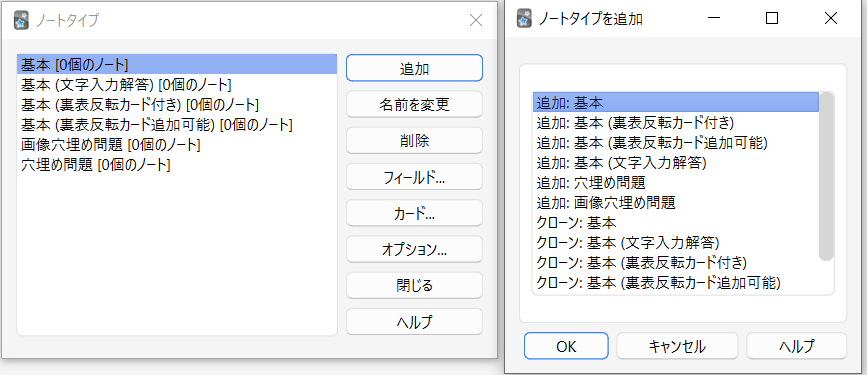</center>


2. 「ノートタイプ管理」上で`qassist`が新しく登録されるので選択した状態で「フィールド」を押し以下の通りフィールドを設定（info.csvの各列に対応）。

<center>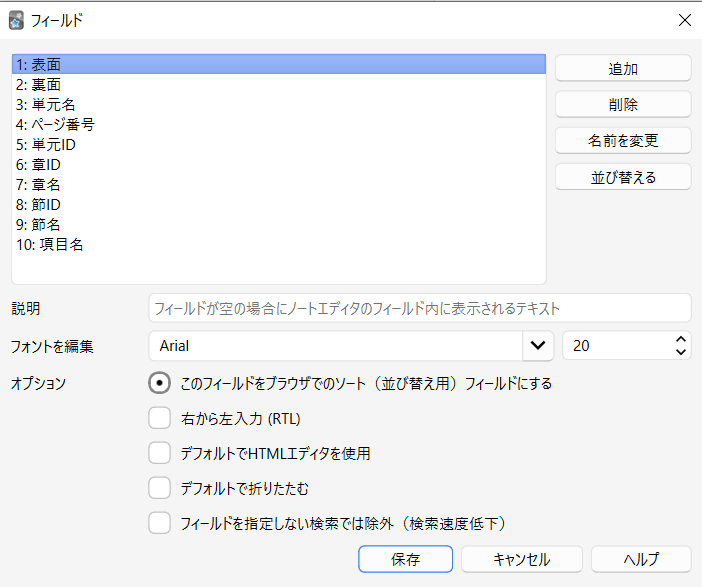</center>


3. 「ツール」→「ノートタイプ管理」より`qassist`を選択した状態で「カード」をクリックし、以下の内容を各項目にコピーアンドペースト。

- 表面のテンプレート
```html
<div class='info'>
  <div class='title'>{{単元名}} ({{単元ID}}{{章ID}} p. {{ページ番号}})</div>
  <div class='section'> {{章名}} / {{節名}}</div>
</div>
{{表面}}
```

- 裏面のテンプレート
```html
<div class='info'>
  <div class='title'>{{単元名}} ({{単元ID}}{{章ID}} p. {{ページ番号}})</div>
  <div class='section'> {{章名}} / {{節名}}</div>
</div>
{{裏面}}
```

- スタイル
```css
.card {
  font-family: arial;
  font-size: 20px;
  text-align: center;
  background-color: white;
}
.info {
  text-align: left;
  border-left: 4px solid #333;
  padding-left: 0.5em;
}
.nightMode .info {
  border-left: 4px solid #ddd;
}
.title {
  font-family: Helvetica;
  font-size: 16px;
  vertical-align: center;
}
.section {
  font-family: Helvetica;
  font-size: 20px;
  vertical-align: bottom;
}
img {
  padding-top: 1em
}
.nightMode img {
  filter: invert(100%) saturate(7);
}
```

4. 「ファイルのインポート」で「ノートタイプ」を作成した `qassist`を指定すれば完了。

<center>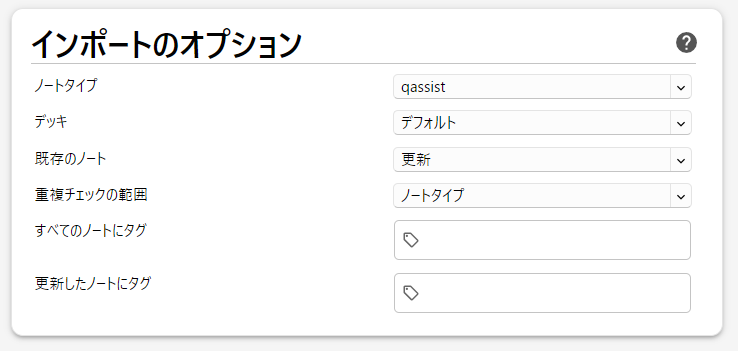</center>
